In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

In [2]:
cluster = SLURMCluster(queue="seseml",
                       memory='50GB',
                       cores=10,
                       processes=1,
                       walltime='24:00:00',)
cluster.scale(jobs=1)
cluster

/data/keeling/a/alfonso8/miniconda3/envs/xradar/lib/python3.10/site-packages/dask_jobqueue/core.py:237: FutureWarning: extra has been renamed to worker_extra_args. You are still using it (even if only set to []; please also check config files). If you did not set worker_extra_args yet, extra will be respected for now, but it will be removed in a future release. If you already set worker_extra_args, extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/data/keeling/a/alfonso8/miniconda3/envs/xradar/lib/python3.10/site-packages/dask_jobqueue/core.py:274: FutureWarning: env_extra has been renamed to job_script_prologue. You are still using it (even if only set to []; please also check config files). If you did not set job_script_prologue yet, env_extra will be respected for now, but it will be removed in a future release. If you already set job_script_prologue, env_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/data/keeling/a/alfonso8

Dashboard: /proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://172.22.179.103:45078,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
%%bash
squeue -u $USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           1805421    seseml dask-wor alfonso8 PD       0:00      1 (None)
           1805420    seseml interact alfonso8  R       2:21      1 keeling-j03


In [4]:
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://172.22.179.103:45078,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [5]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)

/data/keeling/a/alfonso8/miniconda3/envs/xradar/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ HTML PUBLIC "-//IETF//DTD HTML 2.0//EN"><html><head><title>503 Service Unavailable</title></head><body><h1>Service Unavailable</h1><p>The server is temporarily unable to service yourrequest due to maintenance downtime or capacityproblems. Please try again later.</p></body></html>


type: [Errno -70] NetCDF: DAP server error: 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'

In [10]:
ds_wrf = xr.open_dataset('/data/keeling/a/alfonso8/projects/wrf_test/Colombia10kmX10km00Z.nc')

In [11]:
ds_wrf

<xarray.Dataset>
Dimensions:                (Time: 193, south_north: 249, west_east: 249,
                            bottom_top: 32, bottom_top_stag: 33,
                            soil_layers_stag: 4, west_east_stag: 250,
                            south_north_stag: 250)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag
Data variables: (12/197)
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.0 MODEL
    START_DATE:                      2021-12-31_00:00:00
    SIMULATION_START_DATE:           2021-12-31_00:00:00
    WEST-EAST_GRID_DIMENSION:        250
    SOUTH-NORTH_GRID_DIMENSION:      250
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [7]:
ds_wrf.XTIME.max()

<xarray.DataArray 'XTIME' ()>
array('2022-01-05T18:00:00.000000000', dtype='datetime64[ns]')

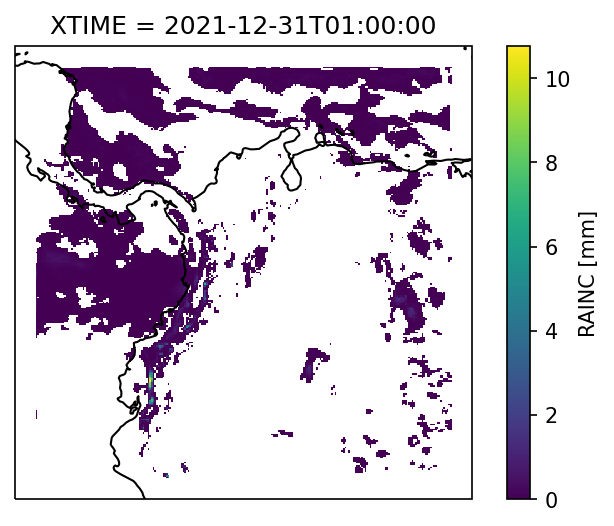

In [8]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

ds_wrf.RAINC.where(ds_wrf.RAINC > 0).isel(Time=1).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                       y='XLAT', x='XLONG',
                                                       cmap='viridis')
ax.coastlines()


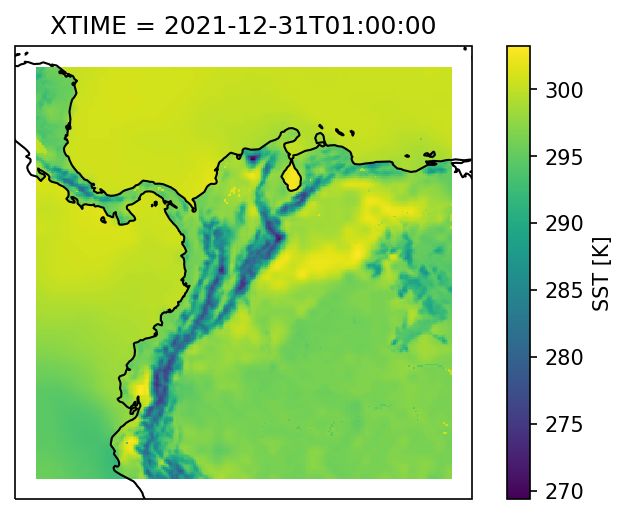

In [9]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

ds_wrf.SST.isel(Time=1).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                       y='XLAT', x='XLONG',
                                                       cmap='viridis')
ax.coastlines()